INSTALLATIONS

In [ ]:
!pip install -q nltk
!pip install -q sentence-transformers

IMPORTS

In [ ]:
import re
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from google.colab import files
from sentence_transformers import SentenceTransformer

DOWNLOADS

In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

UPLOADING THE SAMPLE TEXT FILE

In [ ]:
uploaded = files.upload()

file_name = list(uploaded.keys())[0]

Saving Deep LearningCS7015 Lec 1.1 Biological Neuron 4TC5s_xNKSs-0611221400.txt to Deep LearningCS7015 Lec 1.1 Biological Neuron 4TC5s_xNKSs-0611221400 (2).txt


PARSING AND CREATING THE TIMEFRAME MAPPED TEXT DATAFRAME

In [ ]:
with open(file_name, 'r', encoding='utf-8') as file:
    content = file.read()

blocks = content.strip().split("\n\n")

frame_nums, timestamps, texts = [], [], []

for block in blocks:
    lines = block.strip().split("\n")
    if len(lines) >= 3:
        frame_nums.append(lines[0].strip())
        timestamps.append(lines[1].strip())
        text = " ".join(lines[2:]).strip()
        texts.append(text)

df = pd.DataFrame({
    'Frame': frame_nums,
    'Timestamp': timestamps,
    'Text': texts
})

df.head()

,Frame,Timestamp,Text
0,1,"00:00:00,000 --> 00:00:19,320","Hello everyone, welcome to lecture 1 of C S 7 ..."
1,2,"00:00:19,320 --> 00:00:23,920",In today's lecture is going to be a bit non-te...
2,3,"00:00:23,920 --> 00:00:29,240","concepts, we are going to talk about a brief o..."
3,4,"00:00:29,240 --> 00:00:35,120","So, we hear the terms artificial neural networ..."
4,5,"00:00:35,120 --> 00:00:39,320",and I just wanted you to take you through the ...


In [ ]:
df = pd.read_csv('Test_Transcript_Manipulate.csv')

BASIC CLEANING

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_with_punctuation(text):
    tokens = nltk.word_tokenize(text.lower())
    #tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

def preprocess_cleaned(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # remove punctuation
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [ ]:
df['Text_with_punct'] = df['Text'].apply(preprocess_with_punctuation)
#df['Text_cleaned'] = df['Text'].apply(preprocess_cleaned)

In [ ]:
df

,Unnamed: 0,Frame,Timestamp,Text,Text_with_punct
0,0,1,"00:00:00,000 --> 00:00:19,320","Hello everyone, welcome to lecture 1 of C S 7 ...","hello everyone , welcome to lecture 1 of c s 7..."
1,1,2,"00:00:19,320 --> 00:00:23,920",In today's lecture is going to be a bit non-te...,in today 's lecture is going to be a bit non-t...
2,2,3,"00:00:23,920 --> 00:00:29,240","concepts, we are going to talk about a brief o...","concepts , we are going to talk about a brief ..."
3,3,4,"00:00:29,240 --> 00:00:35,120","So, we hear the terms artificial neural networ...","so , we hear the terms artificial neural netwo..."
4,4,5,"00:00:35,120 --> 00:00:39,320",and I just wanted you to take you through the ...,and i just wanted you to take you through the ...
...,...,...,...,...,...
64,64,65,"00:06:08,520 --> 00:06:13,800",which I have mentioned on the bullet and there...,which i have mentioned on the bullet and there...
65,65,66,"00:06:13,800 --> 00:06:19,400",dates as crack as 1871s maybe I have got some ...,dates as crack as 1871s maybe i have got some ...
66,66,67,"00:06:19,400 --> 00:06:23,480",me if you think some of these portions need to...,me if you think some of these portions need to...
67,67,68,"00:06:23,480 --> 00:06:33,080",could provide me appropriate references for th...,could provide me appropriate references for th...


GETTING THE SENTENCES TO GENERATE EMBEDDINGS FROM

In [ ]:
sentences = []
current = ""
for line in df['Text_with_punct']:
    current += " " + line.strip()
    if line.strip().endswith(('.', '?', '!')):
        sentences.append(current.strip())
        current = ""
if current:
    sentences.append(current.strip())

sentences

['hello everyone , welcome to lecture 1 of c s 7 0 1 5 which is the course on deep learning .',
 "in today 's lecture is going to be a bit non-technical , we are not going to cover any technical concepts , we are going to talk about a brief or partial history of deep learning .",
 'so , we hear the terms artificial neural networks , artificial neurons quite often these days and i just wanted you to take you through the journey of where does all this originate from and this history contains several , a spanz across several fields not just computer science , we will start with biology , then talk about something in physics , then eventually come to computer science and so on right . so , with that let us start . so , just some acknowledgements and disclaimers . so , i have taken lot of this material from the first paper which i have mentioned on the bullet and there might still be some errors because it is dates as crack as 1871s maybe i have got some of the facts wrong . so , feel free 

TEMPORAL

In [ ]:
from datetime import datetime
df[['Start_Time', 'End_Time']] = df['Timestamp'].str.split(' --> ', expand=True)


def timestamp_to_seconds(t):

    dt = datetime.strptime(t.strip(), "%H:%M:%S,%f")
    return dt.hour * 3600 + dt.minute * 60 + dt.second + dt.microsecond / 1e6


df['Start_Seconds'] = df['Start_Time'].apply(timestamp_to_seconds)
df['End_Seconds'] = df['End_Time'].apply(timestamp_to_seconds)


total_duration = df['End_Seconds'].max()


df['TimeStamp based Completion_%'] = (df['End_Seconds'] / total_duration * 100).round(2)


df.head()

,Unnamed: 0,Frame,Timestamp,Text,Text_with_punct,Start_Time,End_Time,Start_Seconds,End_Seconds,TimeStamp based Completion_%
0,0,1,"00:00:00,000 --> 00:00:19,320","Hello everyone, welcome to lecture 1 of C S 7 ...","hello everyone , welcome to lecture 1 of c s 7...","00:00:00,000","00:00:19,320",0.00,19.32,4.63
1,1,2,"00:00:19,320 --> 00:00:23,920",In today's lecture is going to be a bit non-te...,in today 's lecture is going to be a bit non-t...,"00:00:19,320","00:00:23,920",19.32,23.92,5.74
2,2,3,"00:00:23,920 --> 00:00:29,240","concepts, we are going to talk about a brief o...","concepts , we are going to talk about a brief ...","00:00:23,920","00:00:29,240",23.92,29.24,7.01
3,3,4,"00:00:29,240 --> 00:00:35,120","So, we hear the terms artificial neural networ...","so , we hear the terms artificial neural netwo...","00:00:29,240","00:00:35,120",29.24,35.12,8.42
4,4,5,"00:00:35,120 --> 00:00:39,320",and I just wanted you to take you through the ...,and i just wanted you to take you through the ...,"00:00:35,120","00:00:39,320",35.12,39.32,9.43


In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np


model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
cumulative_texts = []
temp = ""
for text in df['Text']:
    temp += " " + text
    cumulative_texts.append(temp.strip())

df['Cumulative_Text'] = cumulative_texts


full_text = ' '.join(df['Text'].tolist())
full_embedding = model.encode(full_text, convert_to_tensor=True)


semantic_completion_scores = []

for cumulative_text in df['Cumulative_Text']:
    chunk_embedding = model.encode(cumulative_text, convert_to_tensor=True)
    similarity = util.cos_sim(chunk_embedding, full_embedding).item()  # cosine similarity
    semantic_completion_scores.append(round(similarity * 100, 2))  #  to percentage


df['Semantic_Completion_%'] = semantic_completion_scores


In [ ]:
df

,Unnamed: 0,Frame,Timestamp,Text,Text_with_punct,Cumulative_Text,Semantic_Completion_%
0,0,1,"00:00:00,000 --> 00:00:19,320","Hello everyone, welcome to lecture 1 of C S 7 ...","hello everyone , welcome to lecture 1 of c s 7...","Hello everyone, welcome to lecture 1 of C S 7 ...",66.28
1,1,2,"00:00:19,320 --> 00:00:23,920",In today's lecture is going to be a bit non-te...,in today 's lecture is going to be a bit non-t...,"Hello everyone, welcome to lecture 1 of C S 7 ...",68.62
2,2,3,"00:00:23,920 --> 00:00:29,240","concepts, we are going to talk about a brief o...","concepts , we are going to talk about a brief ...","Hello everyone, welcome to lecture 1 of C S 7 ...",73.81
3,3,4,"00:00:29,240 --> 00:00:35,120","So, we hear the terms artificial neural networ...","so , we hear the terms artificial neural netwo...","Hello everyone, welcome to lecture 1 of C S 7 ...",69.96
4,4,5,"00:00:35,120 --> 00:00:39,320",and I just wanted you to take you through the ...,and i just wanted you to take you through the ...,"Hello everyone, welcome to lecture 1 of C S 7 ...",72.13
...,...,...,...,...,...,...,...
64,64,65,"00:06:08,520 --> 00:06:13,800",which I have mentioned on the bullet and there...,which i have mentioned on the bullet and there...,"Hello everyone, welcome to lecture 1 of C S 7 ...",100.00
65,65,66,"00:06:13,800 --> 00:06:19,400",dates as crack as 1871s maybe I have got some ...,dates as crack as 1871s maybe i have got some ...,"Hello everyone, welcome to lecture 1 of C S 7 ...",100.00
66,66,67,"00:06:19,400 --> 00:06:23,480",me if you think some of these portions need to...,me if you think some of these portions need to...,"Hello everyone, welcome to lecture 1 of C S 7 ...",100.00
67,67,68,"00:06:23,480 --> 00:06:33,080",could provide me appropriate references for th...,could provide me appropriate references for th...,"Hello everyone, welcome to lecture 1 of C S 7 ...",100.00


In [ ]:
df.drop(['Cumulative_Text'],axis = 1, inplace=True)
df.head()

,Unnamed: 0,Frame,Timestamp,Text,Text_with_punct,Semantic_Completion_%
0,0,1,"00:00:00,000 --> 00:00:19,320","Hello everyone, welcome to lecture 1 of C S 7 ...","hello everyone , welcome to lecture 1 of c s 7...",66.28
1,1,2,"00:00:19,320 --> 00:00:23,920",In today's lecture is going to be a bit non-te...,in today 's lecture is going to be a bit non-t...,68.62
2,2,3,"00:00:23,920 --> 00:00:29,240","concepts, we are going to talk about a brief o...","concepts , we are going to talk about a brief ...",73.81
3,3,4,"00:00:29,240 --> 00:00:35,120","So, we hear the terms artificial neural networ...","so , we hear the terms artificial neural netwo...",69.96
4,4,5,"00:00:35,120 --> 00:00:39,320",and I just wanted you to take you through the ...,and i just wanted you to take you through the ...,72.13


USING CUMULATIVE EMBEDDING DIVERGENCE

In [ ]:
from sklearn.metrics.pairwise import cosine_distances


df['embedding'] = df['Text'].apply(lambda x: model.encode(x, convert_to_numpy=True))


cosine_diffs = [0.0]  # First frame has no previous frame to compare
for i in range(1, len(df)):
    prev_emb = df.loc[i - 1, 'embedding']
    curr_emb = df.loc[i, 'embedding']
    diff = cosine_distances([prev_emb], [curr_emb])[0][0]
    cosine_diffs.append(diff)


cumulative_diff = np.cumsum(cosine_diffs)
semantic_completion = cumulative_diff / cumulative_diff[-1]


df['Semantic_Completion_CED_%'] = semantic_completion * 100


df.drop(columns=['embedding'], inplace=True)
df

,Unnamed: 0,Frame,Timestamp,Text,Text_with_punct,Semantic_Completion_%,Semantic_Completion_CED_%
0,0,1,"00:00:00,000 --> 00:00:19,320","Hello everyone, welcome to lecture 1 of C S 7 ...","hello everyone , welcome to lecture 1 of c s 7...",66.28,0.000000
1,1,2,"00:00:19,320 --> 00:00:23,920",In today's lecture is going to be a bit non-te...,in today 's lecture is going to be a bit non-t...,68.62,1.222503
2,2,3,"00:00:23,920 --> 00:00:29,240","concepts, we are going to talk about a brief o...","concepts , we are going to talk about a brief ...",73.81,2.545915
3,3,4,"00:00:29,240 --> 00:00:35,120","So, we hear the terms artificial neural networ...","so , we hear the terms artificial neural netwo...",69.96,3.620369
4,4,5,"00:00:35,120 --> 00:00:39,320",and I just wanted you to take you through the ...,and i just wanted you to take you through the ...,72.13,5.574033
...,...,...,...,...,...,...,...
64,64,65,"00:06:08,520 --> 00:06:13,800",which I have mentioned on the bullet and there...,which i have mentioned on the bullet and there...,100.00,93.666756
65,65,66,"00:06:13,800 --> 00:06:19,400",dates as crack as 1871s maybe I have got some ...,dates as crack as 1871s maybe i have got some ...,100.00,95.553694
66,66,67,"00:06:19,400 --> 00:06:23,480",me if you think some of these portions need to...,me if you think some of these portions need to...,100.00,97.269009
67,67,68,"00:06:23,480 --> 00:06:33,080",could provide me appropriate references for th...,could provide me appropriate references for th...,100.00,98.346988


USING NEXT SENTENCE PREDICTION

In [ ]:
!pip install transformers --quiet

In [ ]:
import torch
from transformers import BertTokenizer, BertForNextSentencePrediction
from transformers import GPT2Tokenizer, GPT2LMHeadModel

In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertForNextSentencePrediction.from_pretrained('bert-base-uncased')
bert_model.eval()

gpt2_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
gpt2_model = GPT2LMHeadModel.from_pretrained('gpt2')
gpt2_model.eval()

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [ ]:
import math
import warnings

sentences = df['Text_with_punct'].fillna("").tolist()

nsp_scores = []
valid_indices = []

for i in range(len(sentences) - 1):
    try:
        inputs = bert_tokenizer(sentences[i], sentences[i + 1], return_tensors='pt', truncation=True, max_length=512)
        with torch.no_grad():
            outputs = bert_model(**inputs)
        logits = outputs.logits
        probs = torch.nn.functional.softmax(logits, dim=1)
        nsp_prob = probs[0][0].item()  # IsNext
        nsp_scores.append(nsp_prob)
    except Exception as e:
        warnings.warn(f"NSP failed at index {i}: {e}")
        nsp_scores.append(0.5)  # neutral confidence if error

# Pad NSP completion
cum_nsp = np.cumsum(nsp_scores)
completion_nsp = cum_nsp / cum_nsp[-1]
completion_nsp = np.insert(completion_nsp, 0, 0.0)
completion_nsp = np.pad(completion_nsp, (0, len(sentences) - len(completion_nsp)), 'edge')



In [ ]:
df

,Unnamed: 0,Frame,Timestamp,Text,Text_with_punct,Semantic_Completion_%,Semantic_Completion_CED_%
0,0,1,"00:00:00,000 --> 00:00:19,320","Hello everyone, welcome to lecture 1 of C S 7 ...","hello everyone , welcome to lecture 1 of c s 7...",66.28,0.000000
1,1,2,"00:00:19,320 --> 00:00:23,920",In today's lecture is going to be a bit non-te...,in today 's lecture is going to be a bit non-t...,68.62,1.222503
2,2,3,"00:00:23,920 --> 00:00:29,240","concepts, we are going to talk about a brief o...","concepts , we are going to talk about a brief ...",73.81,2.545915
3,3,4,"00:00:29,240 --> 00:00:35,120","So, we hear the terms artificial neural networ...","so , we hear the terms artificial neural netwo...",69.96,3.620369
4,4,5,"00:00:35,120 --> 00:00:39,320",and I just wanted you to take you through the ...,and i just wanted you to take you through the ...,72.13,5.574033
...,...,...,...,...,...,...,...
64,64,65,"00:06:08,520 --> 00:06:13,800",which I have mentioned on the bullet and there...,which i have mentioned on the bullet and there...,100.00,93.666756
65,65,66,"00:06:13,800 --> 00:06:19,400",dates as crack as 1871s maybe I have got some ...,dates as crack as 1871s maybe i have got some ...,100.00,95.553694
66,66,67,"00:06:19,400 --> 00:06:23,480",me if you think some of these portions need to...,me if you think some of these portions need to...,100.00,97.269009
67,67,68,"00:06:23,480 --> 00:06:33,080",could provide me appropriate references for th...,could provide me appropriate references for th...,100.00,98.346988


In [ ]:
df['NSP_Completion_%'] = completion_nsp[:len(df)]*100

PERPLXITY BASED CUMULATIVE INFO GENERATION

In [ ]:
def compute_perplexity(text):
    try:
        enc = gpt2_tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        input_ids = enc.input_ids
        with torch.no_grad():
            output = gpt2_model(input_ids, labels=input_ids)
        loss = output.loss
        return math.exp(loss.item())
    except Exception as e:
        warnings.warn(f"Perplexity failed: {e}")
        return 100  # very high perplexity as fallback

perplexities = [compute_perplexity(text) for text in sentences]
info_density = np.array(perplexities)
normalized_info = info_density / info_density.sum()
cum_info = np.cumsum(normalized_info)


cum_info = np.pad(cum_info, (0, len(sentences) - len(cum_info)), 'edge')

df['Info_Completion'] = cum_info[:len(df)] *100

In [ ]:
df

,Unnamed: 0,Frame,Timestamp,Text,Text_with_punct,Semantic_Completion_%,Semantic_Completion_CED_%,NSP_Completion_%,Info_Completion
0,0,1,"00:00:00,000 --> 00:00:19,320","Hello everyone, welcome to lecture 1 of C S 7 ...","hello everyone , welcome to lecture 1 of c s 7...",66.28,0.000000,0.000000,1.409460
1,1,2,"00:00:19,320 --> 00:00:23,920",In today's lecture is going to be a bit non-te...,in today 's lecture is going to be a bit non-t...,68.62,1.222503,1.493432,1.703150
2,2,3,"00:00:23,920 --> 00:00:29,240","concepts, we are going to talk about a brief o...","concepts , we are going to talk about a brief ...",73.81,2.545915,2.986864,2.021514
3,3,4,"00:00:29,240 --> 00:00:35,120","So, we hear the terms artificial neural networ...","so , we hear the terms artificial neural netwo...",69.96,3.620369,4.480295,4.358384
4,4,5,"00:00:35,120 --> 00:00:39,320",and I just wanted you to take you through the ...,and i just wanted you to take you through the ...,72.13,5.574033,5.973562,4.827268
...,...,...,...,...,...,...,...,...,...
64,64,65,"00:06:08,520 --> 00:06:13,800",which I have mentioned on the bullet and there...,which i have mentioned on the bullet and there...,100.00,93.666756,94.026340,91.305279
65,65,66,"00:06:13,800 --> 00:06:19,400",dates as crack as 1871s maybe I have got some ...,dates as crack as 1871s maybe i have got some ...,100.00,95.553694,95.519768,92.639124
66,66,67,"00:06:19,400 --> 00:06:23,480",me if you think some of these portions need to...,me if you think some of these portions need to...,100.00,97.269009,97.013194,92.829702
67,67,68,"00:06:23,480 --> 00:06:33,080",could provide me appropriate references for th...,could provide me appropriate references for th...,100.00,98.346988,98.506625,96.653267


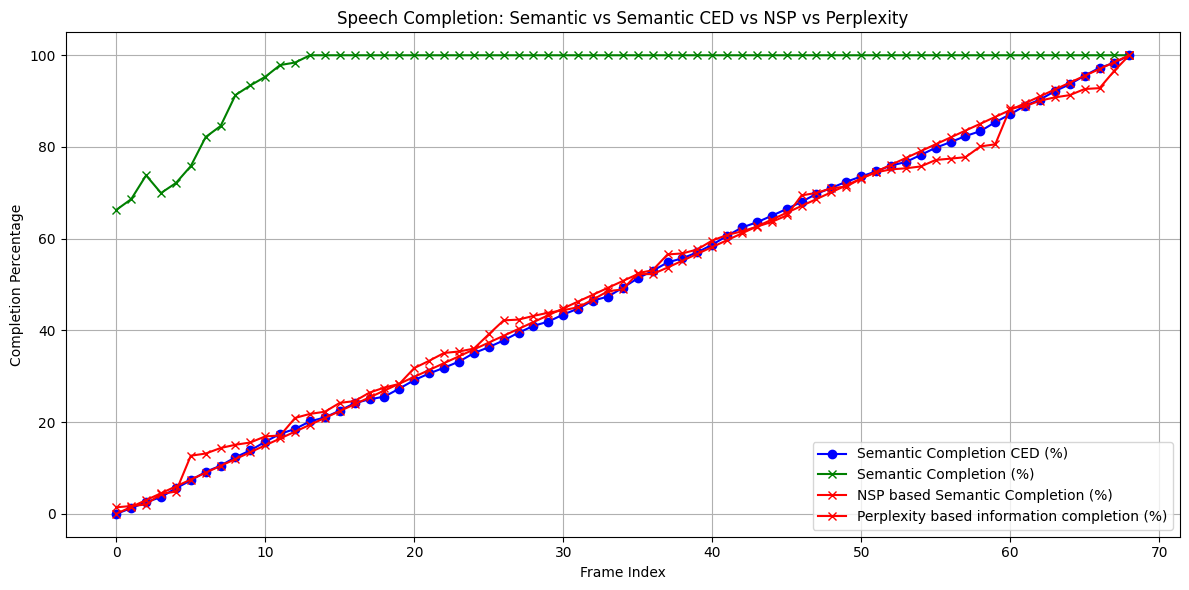

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(12, 6))


plt.plot(df.index, df['Semantic_Completion_CED_%'], label='Semantic Completion CED (%)', color='blue', marker='o')

plt.plot(df.index, df['Semantic_Completion_%'], label='Semantic Completion (%)', color='green', marker='x')

plt.plot(df.index, df['NSP_Completion_%'], label='NSP based Semantic Completion (%)', color='red', marker='x')

plt.plot(df.index, df['Info_Completion'], label='Perplexity based information completion (%)', color='red', marker='x')

plt.title('Speech Completion: Semantic vs Semantic CED vs NSP vs Perplexity')
plt.xlabel('Frame Index')
plt.ylabel('Completion Percentage')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

